In [50]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook

In [51]:
X_train = pd.read_csv("har_data/train_time_series.csv") 
y_train = pd.read_csv("har_data/train_labels.csv")
X_test = pd.read_csv("har_data/test_time_series.csv")
y_test = pd.read_csv("har_data/test_labels.csv")

In [52]:
activities = {1:'standing', 2:'walking', 3:'stairs-down', 4:'stairs-up'}

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3744 non-null   int64  
 1   timestamp   3744 non-null   int64  
 2   UTC time    3744 non-null   object 
 3   accuracy    3744 non-null   object 
 4   x           3744 non-null   float64
 5   y           3744 non-null   float64
 6   z           3744 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 204.9+ KB


In [54]:
y_train.head()

,Unnamed: 0,timestamp,UTC time,label
0,20589,1565109931087,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,1


In [55]:
labels = []
for i in range(len(y_train.label)):
    label = np.repeat(y_train.label[i], 9)
    labels.extend([*label, y_train.label[i]])
    
X_train['label'] = labels[:-6]

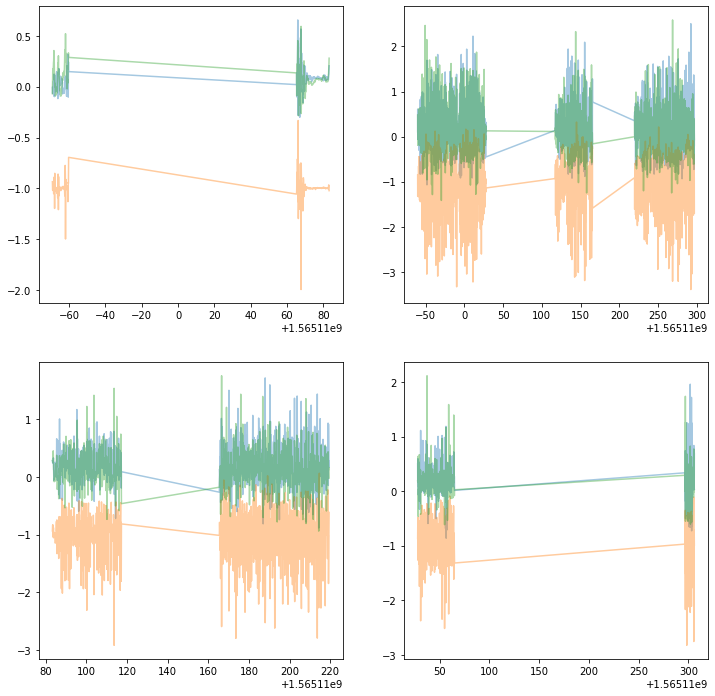

In [77]:
walking = X_train.label == 1
standing = X_train.label == 2
stairs_down = X_train.label == 3
stairs_up = X_train.label == 4
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.plot(X_train.timestamp[walking]/1000, X_train.x[walking], '-', alpha=0.4)
plt.plot(X_train.timestamp[walking]/1000, X_train.y[walking], '-', alpha=0.4)
plt.plot(X_train.timestamp[walking]/1000, X_train.z[walking], '-', alpha=0.4)
plt.subplot(222)
plt.plot(X_train.timestamp[standing]/1000, X_train.x[standing], '-', alpha=0.4)
plt.plot(X_train.timestamp[standing]/1000, X_train.y[standing], '-', alpha=0.4)
plt.plot(X_train.timestamp[standing]/1000, X_train.z[standing], '-', alpha=0.4)
plt.subplot(223)
plt.plot(X_train.timestamp[stairs_down]/1000, X_train.x[stairs_down], '-', alpha=0.4)
plt.plot(X_train.timestamp[stairs_down]/1000, X_train.y[stairs_down], '-', alpha=0.4)
plt.plot(X_train.timestamp[stairs_down]/1000, X_train.z[stairs_down], '-', alpha=0.4)
plt.subplot(224)
plt.plot(X_train.timestamp[stairs_up]/1000, X_train.x[stairs_up], '-', alpha=0.4)
plt.plot(X_train.timestamp[stairs_up]/1000, X_train.y[stairs_up], '-', alpha=0.4)
plt.plot(X_train.timestamp[stairs_up]/1000, X_train.z[stairs_up], '-', alpha=0.4)

In [57]:
facet_data = X_train[['x','y','z', 'label']]

Text(0.5, 0.98, 'Tri-Axial Acceralometer Data')

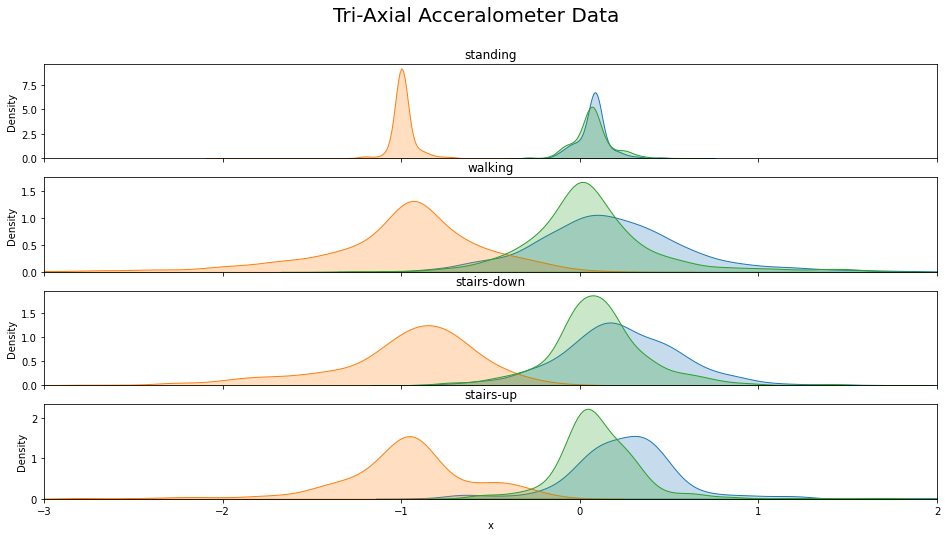

In [72]:
walking = X_train.label == 1
standing = X_train.label == 2
stairs_down = X_train.label == 3
stairs_up = X_train.label == 4
%matplotlib inline
fig,axs = plt.subplots(4,1, figsize = (16,8), sharex=True)
sns.kdeplot(X_train.x[walking], shade=True, ax=axs[0])
sns.kdeplot(X_train.y[walking], shade=True, ax=axs[0])
sns.kdeplot(X_train.z[walking], shade=True, ax=axs[0])

sns.kdeplot(X_train.x[standing], shade=True, ax=axs[1])
sns.kdeplot(X_train.y[standing], shade=True, ax=axs[1])
sns.kdeplot(X_train.z[standing], shade=True, ax=axs[1])

sns.kdeplot(X_train.x[stairs_down], shade=True, ax=axs[2])
sns.kdeplot(X_train.y[stairs_down], shade=True, ax=axs[2])
sns.kdeplot(X_train.z[stairs_down], shade=True, ax=axs[2])

sns.kdeplot(X_train.x[stairs_up], shade=True, ax=axs[3])
sns.kdeplot(X_train.y[stairs_up], shade=True, ax=axs[3])
sns.kdeplot(X_train.z[stairs_up], shade=True, ax=axs[3])

axs[0].set_title(activities[1])
axs[1].set_title(activities[2])
axs[2].set_title(activities[3])
axs[3].set_title(activities[4])

axs[0].set_xlim((-3,2))
fig.suptitle("Tri-Axial Acceralometer Data", fontsize=20)